Author: Emily Wong \
April 23, 2024

In [17]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import scipy
from scipy.stats import ttest_ind, ttest_1samp, f_oneway

# Bias Measures

In [4]:
PHQ9_orig = pd.read_excel("PHQ9_orig_results.xlsx")
PHQ9_boot = pd.read_excel("PHQ9_boot_test_results.xlsx")
PHQ9_cv = pd.read_excel("PHQ9_repeat_results.xlsx")
EPDS_orig = pd.read_excel("EPDS_orig_results.xlsx")
EPDS_boot = pd.read_excel("EPDS_boot_test_results.xlsx")
EPDS_cv = pd.read_excel("EPDS_repeat_results.xlsx")

In [5]:
PHQ9_orig['Scale'] = 'PHQ9'
PHQ9_cv['Scale'] = 'PHQ9'
PHQ9_boot['Scale'] = 'PHQ9'
EPDS_orig['Scale'] = 'EPDS'
EPDS_boot['Scale'] = 'EPDS'
EPDS_cv['Scale'] = 'EPDS'

In [6]:
all_orig = pd.concat([PHQ9_orig,EPDS_orig],axis=0)
del all_orig[all_orig.columns[0]]

all_boot = pd.concat([PHQ9_boot,EPDS_boot],axis=0)
del all_boot[all_boot.columns[0]]

all_cv = pd.concat([PHQ9_cv,EPDS_cv],axis=0)
del all_cv[all_cv.columns[0]]

In [7]:
all_orig['Race'] = all_orig['Race'].str[9:]
all_boot['Race'] = all_boot['Race'].str[9:]
all_cv['Race'] = all_cv['Race'].str[9:]

In [8]:
all_orig['Race'] = all_orig['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                             'Black or African American':'Black',
                                             'Multiracial':'Multi',
                                             'Hispanic White':'Hispanic'})

all_boot['Race'] = all_boot['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                             'Black or African American':'Black',
                                             'Multiracial':'Multi',
                                             'Hispanic White':'Hispanic'})

all_cv['Race'] = all_cv['Race'].replace({'Asian or Native Hawaiian or Other Pacific Islander':'AAPI',
                                         'Black or African American':'Black',
                                         'Multiracial':'Multi',
                                         'Hispanic White':'Hispanic'})

In [9]:
all_orig['Model'] = all_orig['Model'].replace({'RF Model':'RF'})
all_boot['Model'] = all_boot['Model'].replace({'RF Model':'RF'})
all_cv['Model'] = all_cv['Model'].replace({'RF Model':'RF'})

In [10]:
races = all_cv.Race.unique()

## Boostrap

In [12]:
dat_diff_boot = all_boot[all_boot['Race']!='White']

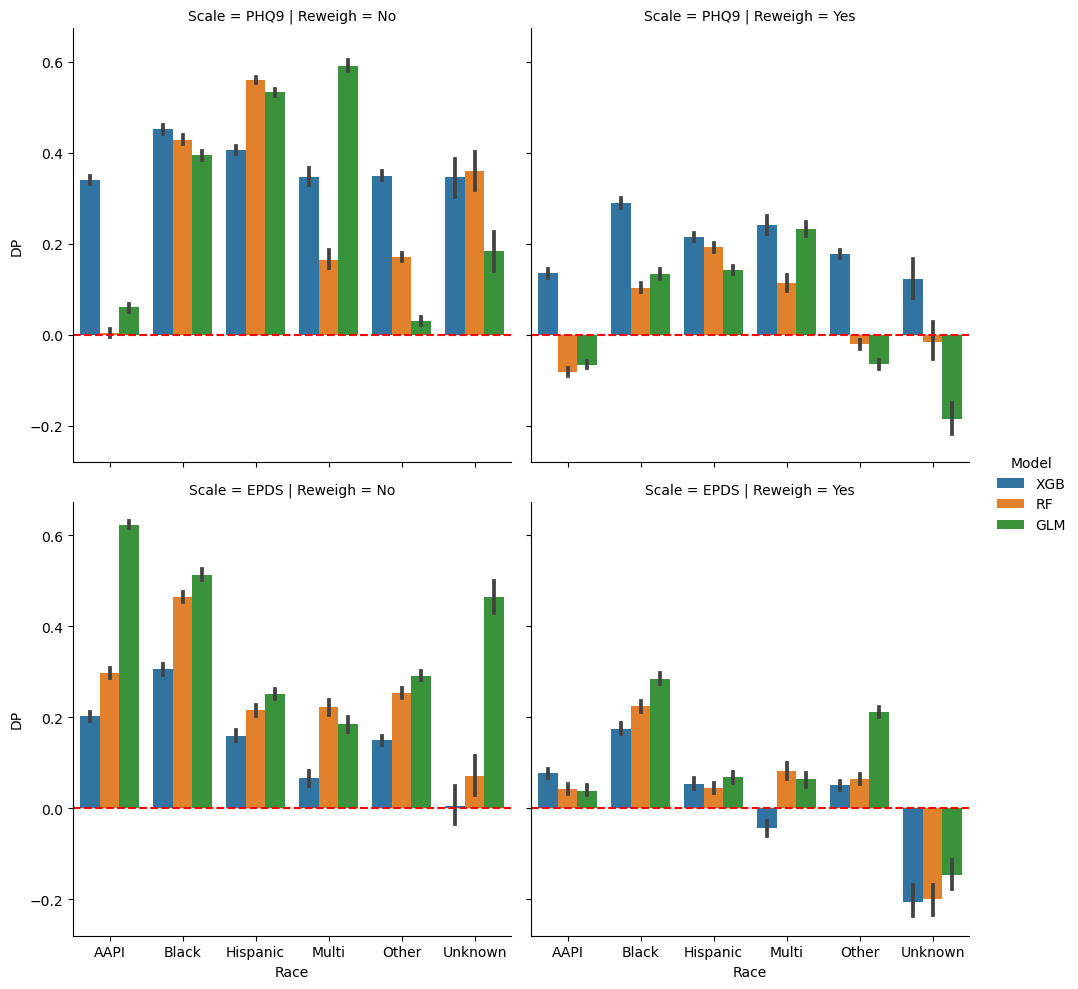

In [13]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['DP'].notnull()], x='Race', y='DP', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('DP (boot).svg',format='svg',dpi=600)

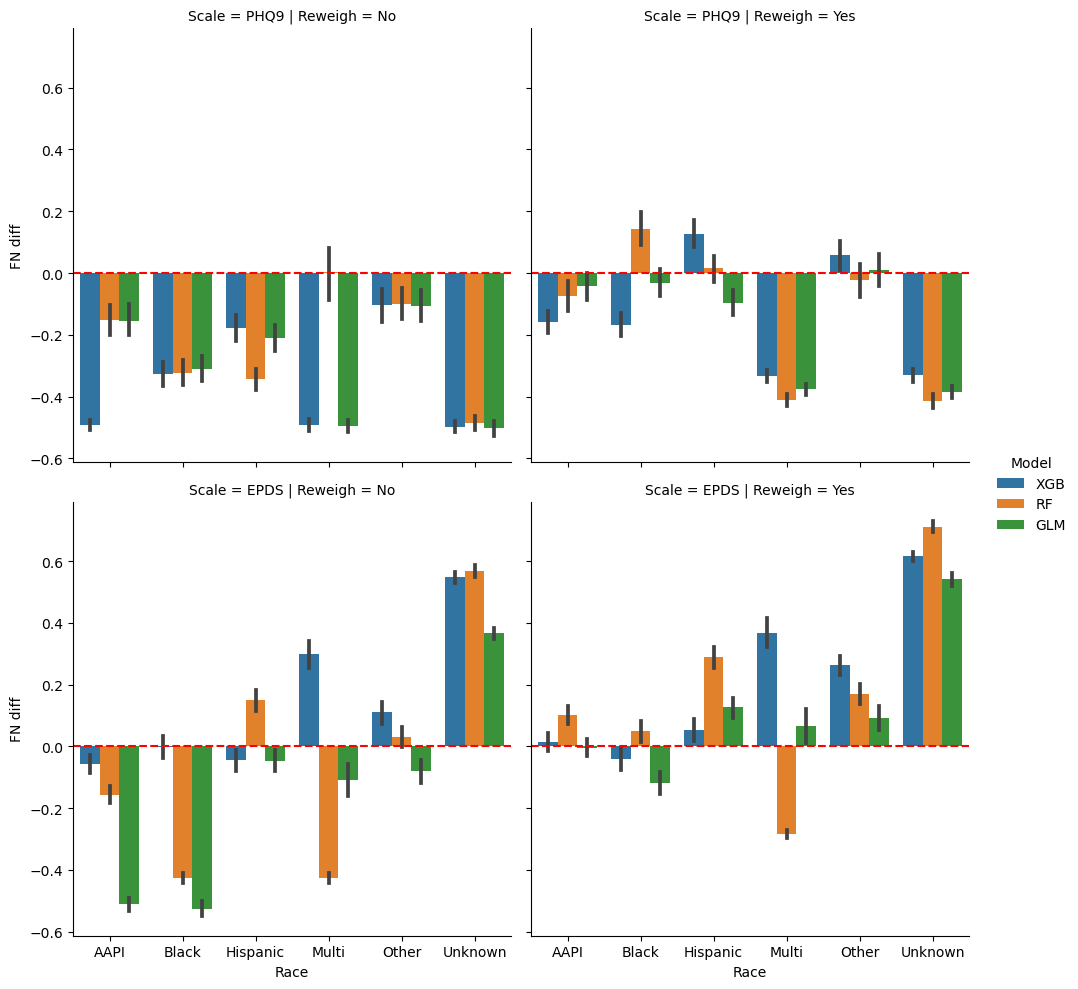

In [14]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['FN diff'].notnull()], x='Race', y='FN diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FN diff (boot).svg',format='svg',dpi=600)

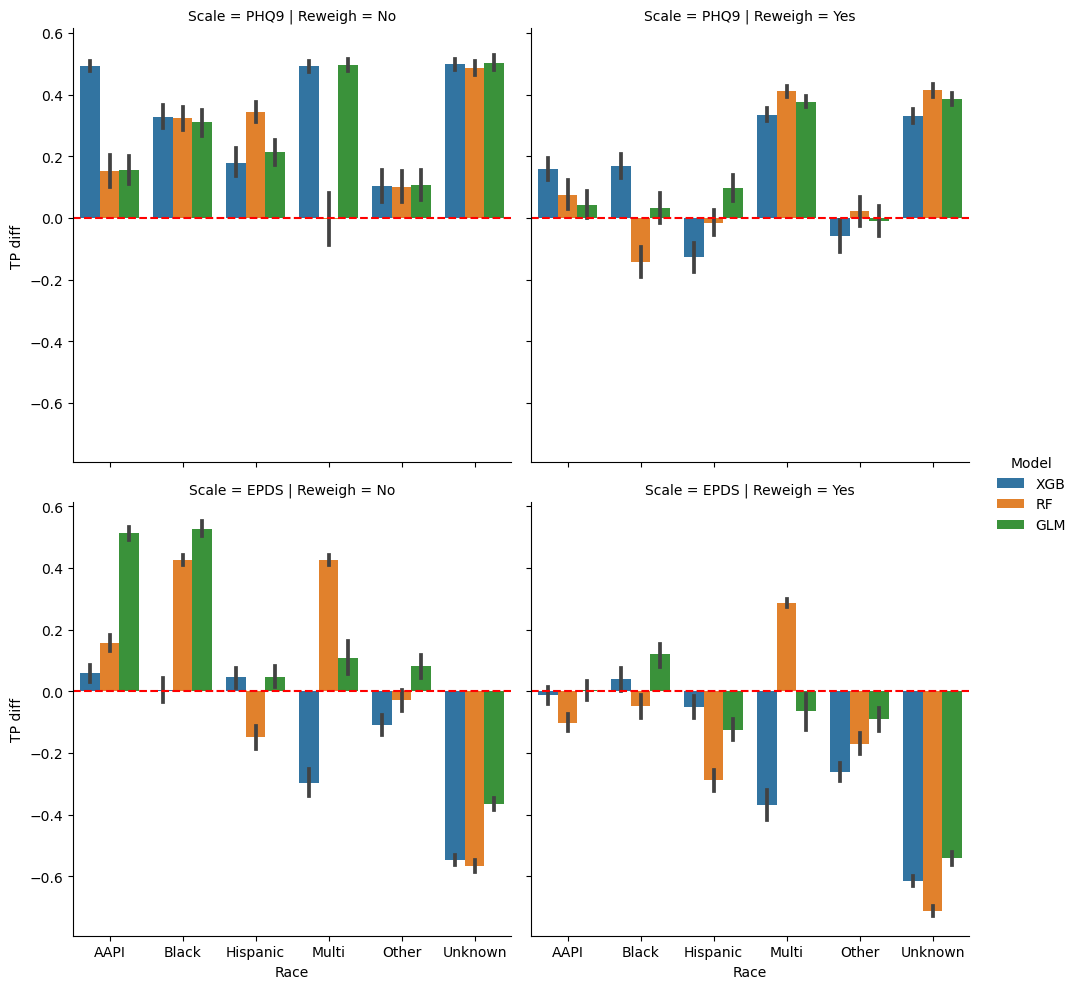

In [15]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['TP diff'].notnull()], x='Race', y='TP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('TP diff (boot).svg',format='svg',dpi=600)

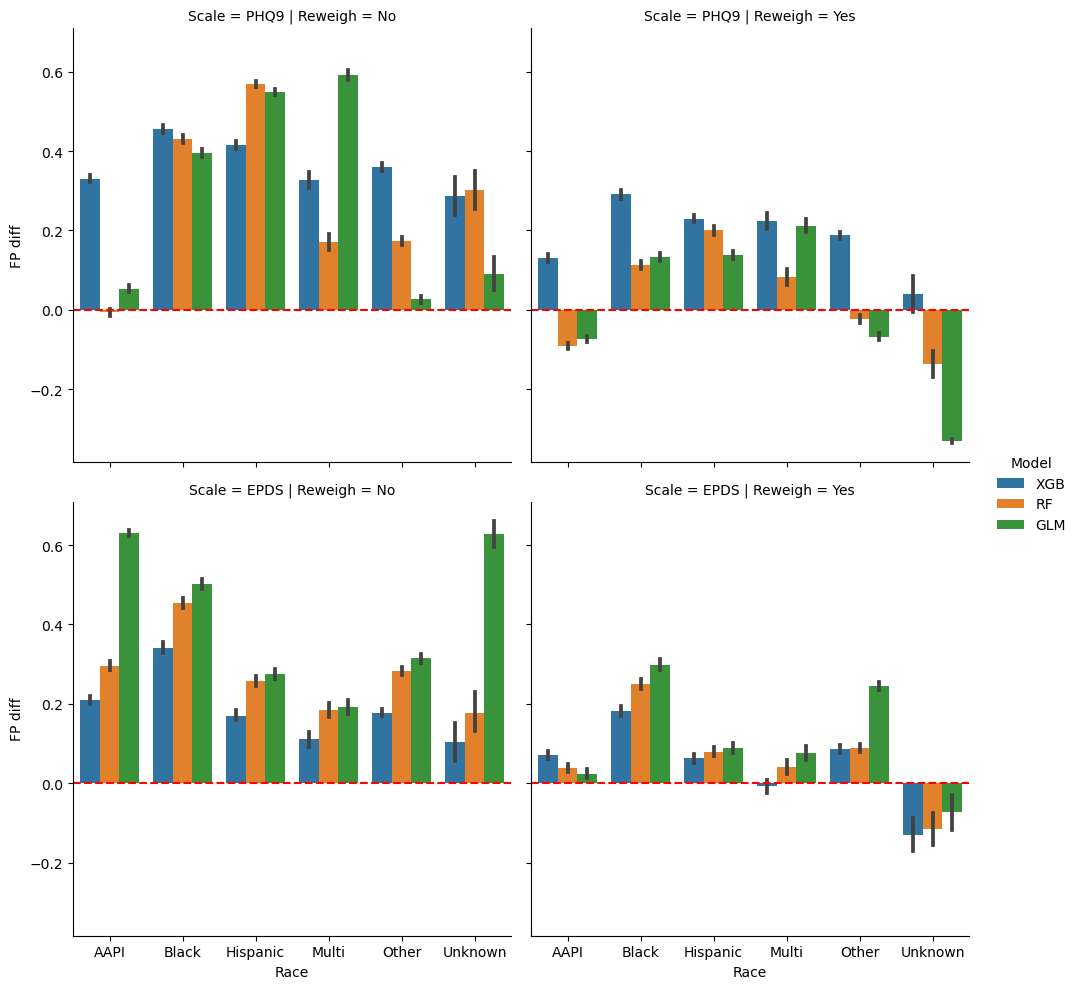

In [16]:
fig = sns.catplot(data=dat_diff_boot[dat_diff_boot['FP diff'].notnull()], x='Race', y='FP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FP diff (boot).svg',format='svg',dpi=600)

## Cross Validation

In [18]:
dat_diff_cv = all_cv[all_cv['Race']!='White']

In [19]:
print('*** DEMOGRAPHIC PARITY *** \n')

print('One sample t-test (no reweigh):')
one_samp = ttest_1samp(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('One sample t-test (reweigh):')
one_samp = ttest_1samp(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('Two sample t-test:')
two_samp = ttest_ind(dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['DP'].notnull()],
                     dat_diff_cv['DP'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['DP'].notnull()],
                     equal_var=False)
print(two_samp)
print(two_samp.confidence_interval(confidence_level=0.95))

*** DEMOGRAPHIC PARITY *** 

One sample t-test (no reweigh):
Mean 0.2231990783076035
ConfidenceInterval(low=0.21701362836674068, high=0.2293845282484663)
TtestResult(statistic=70.74817980485194, pvalue=0.0, df=3599) 

One sample t-test (reweigh):
Mean 0.039078980685859126
ConfidenceInterval(low=0.0348099791715085, high=0.04334798220020975)
TtestResult(statistic=17.947794528211766, pvalue=4.701219157864917e-69, df=3599) 

Two sample t-test:
TtestResult(statistic=48.03214823662802, pvalue=0.0, df=6393.572443318445)
ConfidenceInterval(low=0.17660560780485157, high=0.19163458743863715)


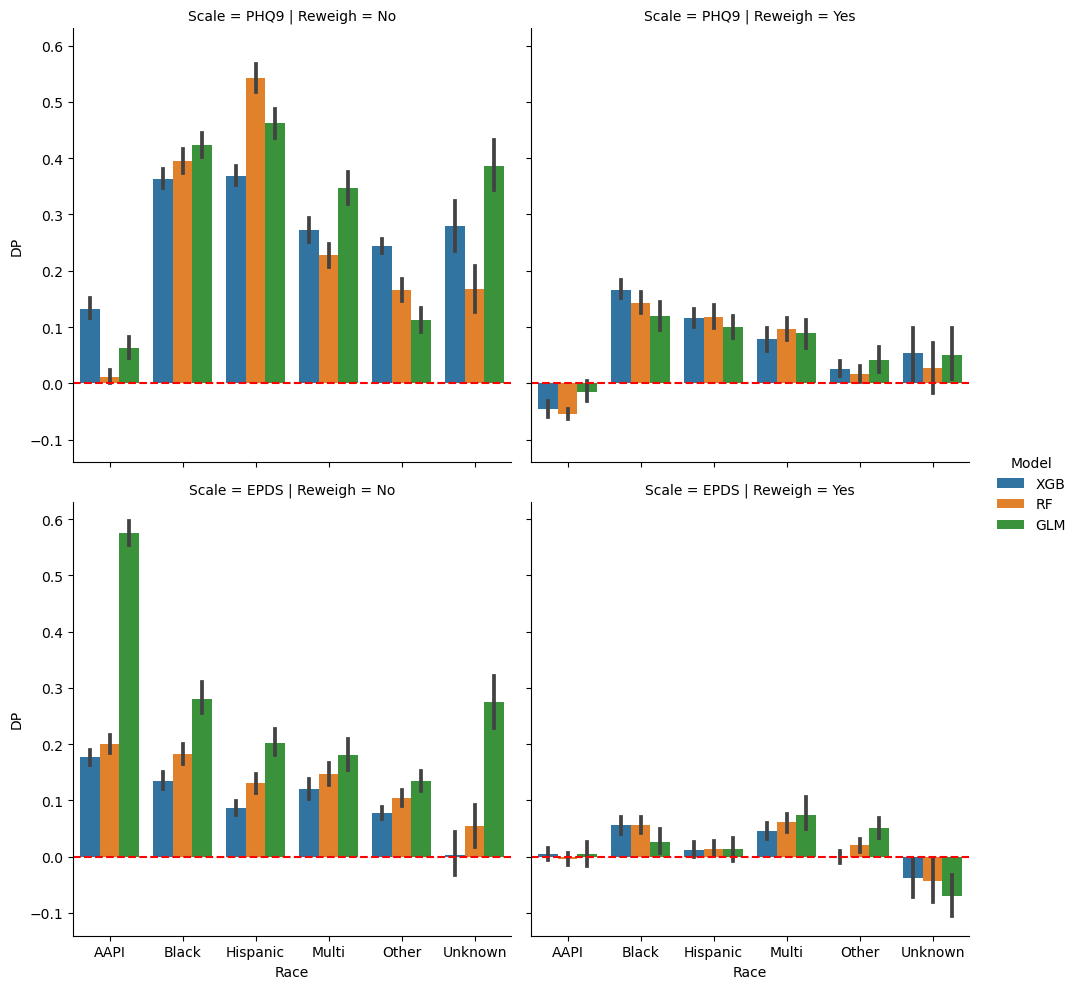

In [20]:
fig = sns.catplot(data=dat_diff_cv[(dat_diff_cv['DP'].notnull())], x='Race', y='DP', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('DP (cv).svg',format='svg',dpi=600)

In [21]:
print('*** FALSE NEGATIVE DIFF *** \n')

print('One sample t-test (no reweigh):')
one_samp = ttest_1samp(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('One sample t-test (reweigh):')
one_samp = ttest_1samp(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

print('Two sample t-test:')
two_samp = ttest_ind(dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='No') & dat_diff_cv['FN diff'].notnull()],
                     dat_diff_cv['FN diff'][(dat_diff_cv.Reweigh=='Yes') & dat_diff_cv['FN diff'].notnull()],
                     equal_var=False)
print(two_samp)
print(two_samp.confidence_interval(confidence_level=0.95))

*** FALSE NEGATIVE DIFF *** 

One sample t-test (no reweigh):
Mean -0.1763311457502208
ConfidenceInterval(low=-0.1864834076050867, high=-0.1661788838953549)
TtestResult(statistic=-34.054277577518015, pvalue=1.8465587495238348e-218, df=3341) 

One sample t-test (reweigh):
Mean 0.002046264964069226
ConfidenceInterval(low=-0.007823137215008458, high=0.01191566714314691)
TtestResult(statistic=0.4065149057700784, pvalue=0.6843903444513425, df=3341) 

Two sample t-test:
TtestResult(statistic=-24.701128813177366, pvalue=5.5540153606832044e-129, df=6676.671703210702)
ConfidenceInterval(low=-0.1925337148014326, high=-0.16422110662714745)


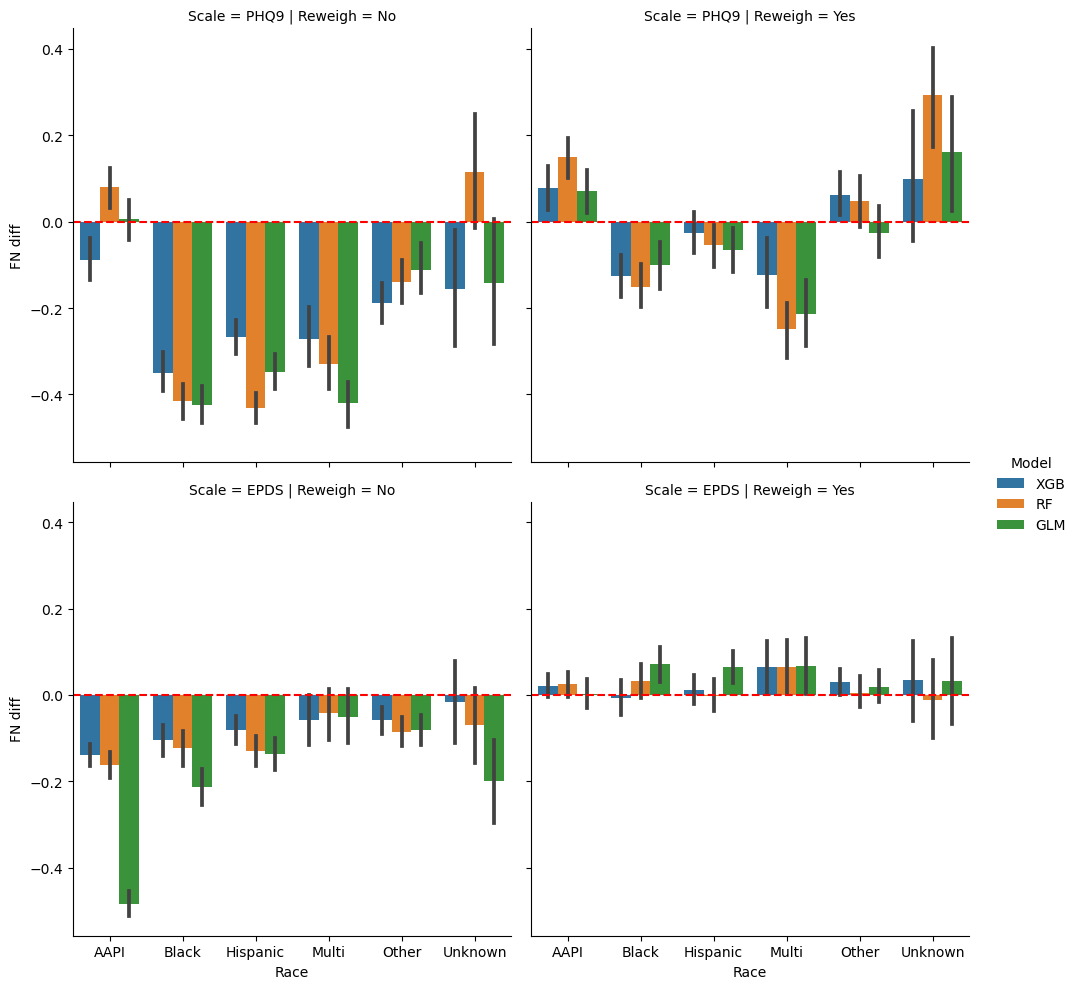

In [22]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['FN diff'].notnull()], x='Race', y='FN diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FN diff (cv).svg',format='svg',dpi=600)

In [23]:
print('*** TP DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['TP diff'][dat_diff_cv['TP diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['TP diff'][dat_diff_cv['TP diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** TP DIFF *** 

Mean 0.08714244039307577
ConfidenceInterval(low=0.07974874162210208, high=0.09453613916404946)
TtestResult(statistic=23.104401265778236, pvalue=1.0835367512714838e-113, df=6683) 



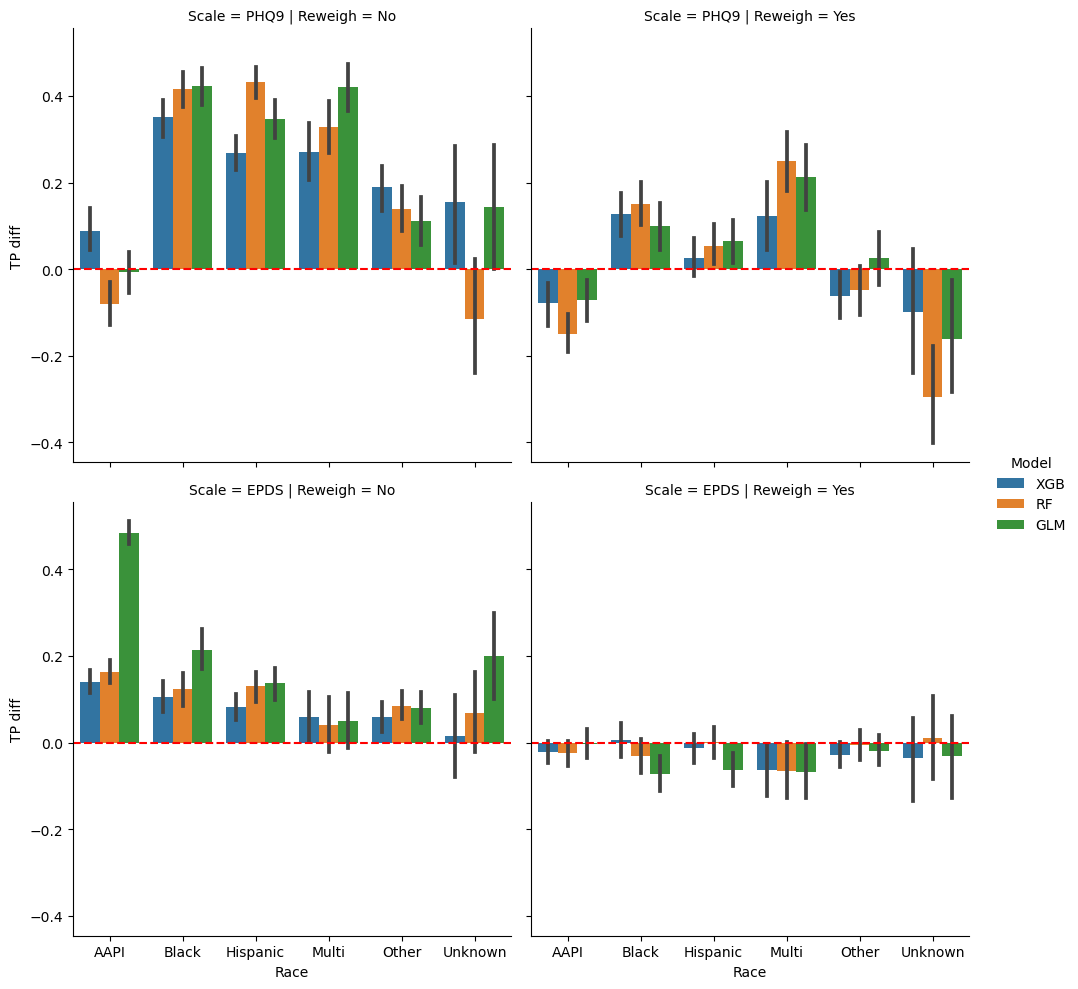

In [24]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['TP diff'].notnull()], x='Race', y='TP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('TP diff (cv).svg',format='svg',dpi=600)

In [25]:
print('*** FP DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['FP diff'][dat_diff_cv['FP diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['FP diff'][dat_diff_cv['FP diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** FP DIFF *** 

Mean 0.12899996716600196
ConfidenceInterval(low=0.12452630978169418, high=0.13347362455030973)
TtestResult(statistic=56.52596612600273, pvalue=0.0, df=7199) 



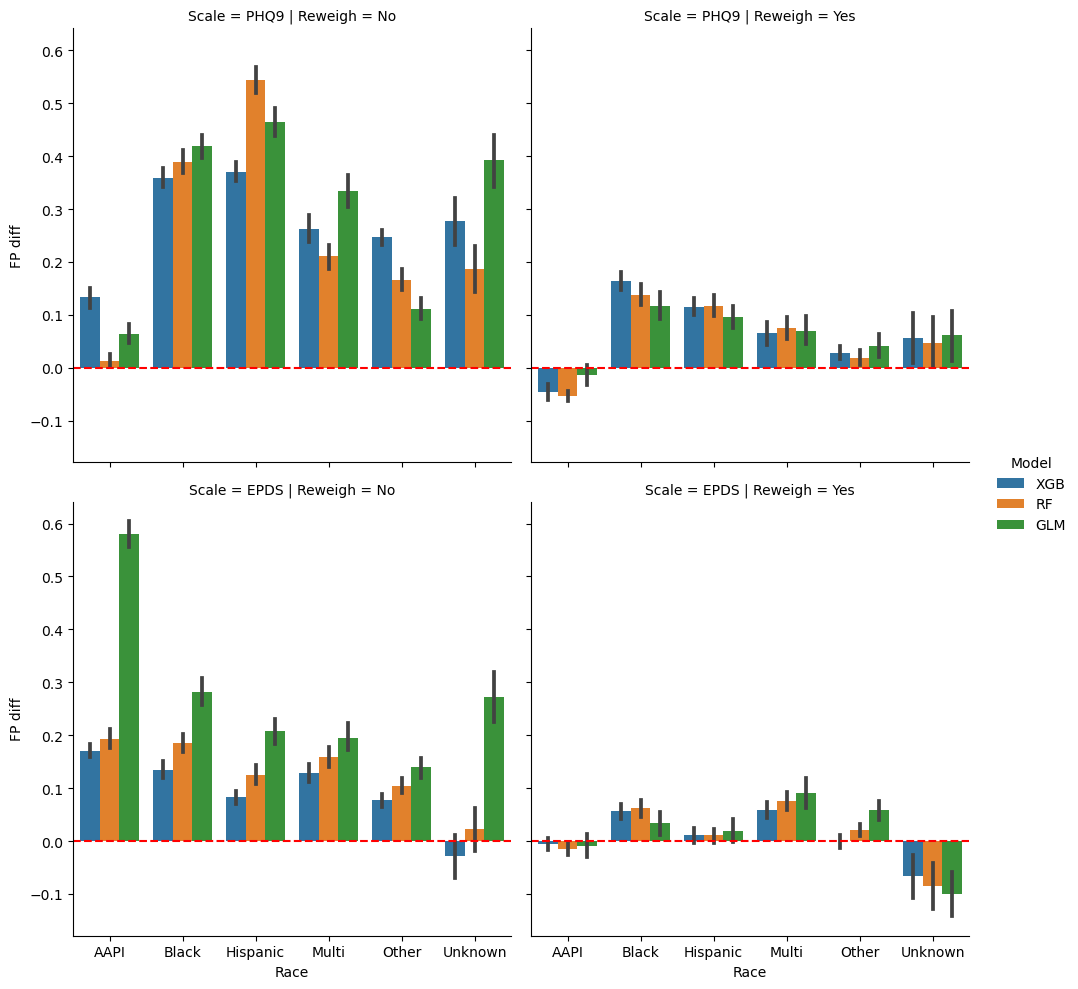

In [26]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['FP diff'].notnull()], x='Race', y='FP diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('FP diff (cv).svg',format='svg',dpi=600)

In [27]:
print('*** TEST AUC DIFF *** \n')

one_samp = ttest_1samp(dat_diff_cv['Test AUC diff'][dat_diff_cv['Test AUC diff'].notnull()],popmean=0)
print('Mean',np.mean(dat_diff_cv['Test AUC diff'][dat_diff_cv['Test AUC diff'].notnull()]))
print(one_samp.confidence_interval(confidence_level=0.95))
print(one_samp,'\n')

*** TEST AUC DIFF *** 

Mean -0.018209455415918605
ConfidenceInterval(low=-0.02236143183873505, high=-0.014057478993102158)
TtestResult(statistic=-8.59743364069926, pvalue=1.0040217088173462e-17, df=6683) 



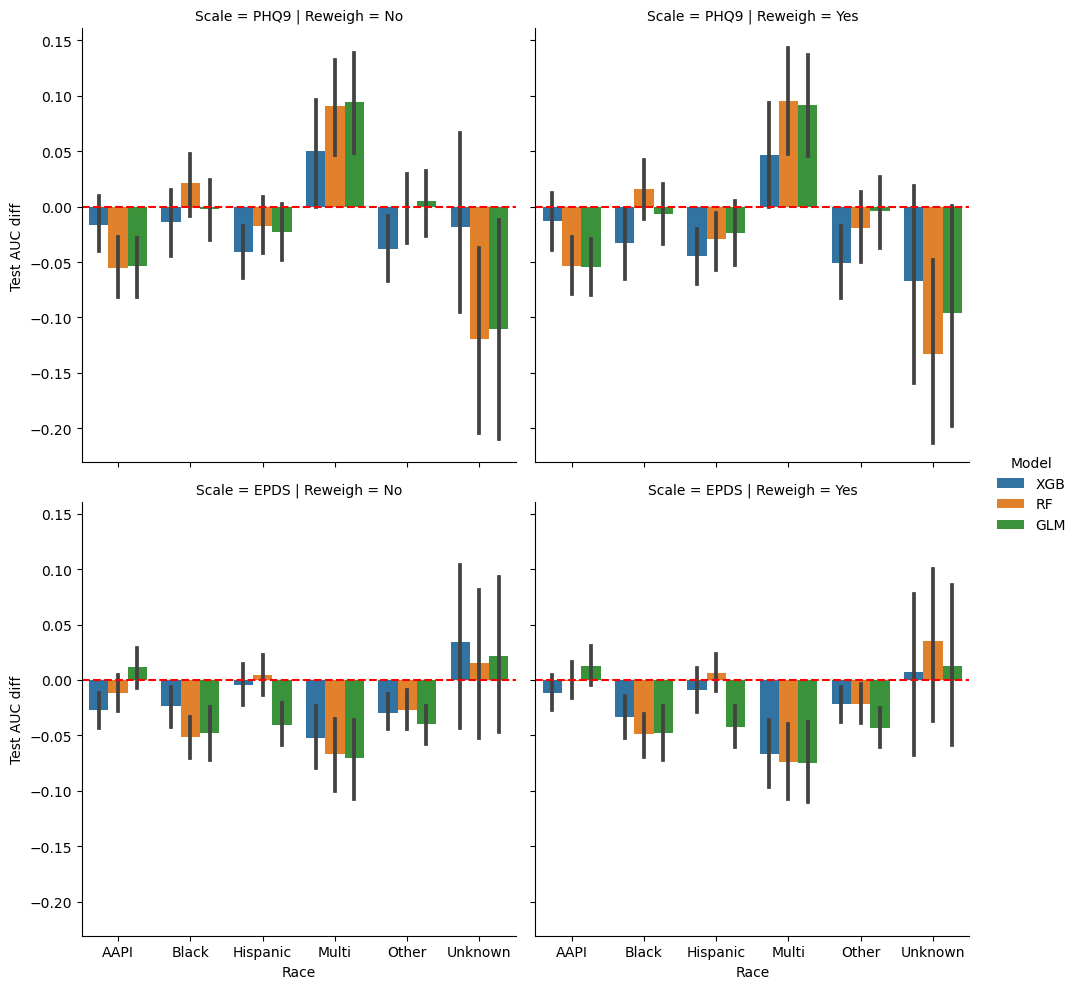

In [28]:
fig = sns.catplot(data=dat_diff_cv[dat_diff_cv['Test AUC diff'].notnull()], x='Race', y='Test AUC diff', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('AUC diff by Race (cv).svg',format='svg',dpi=600)

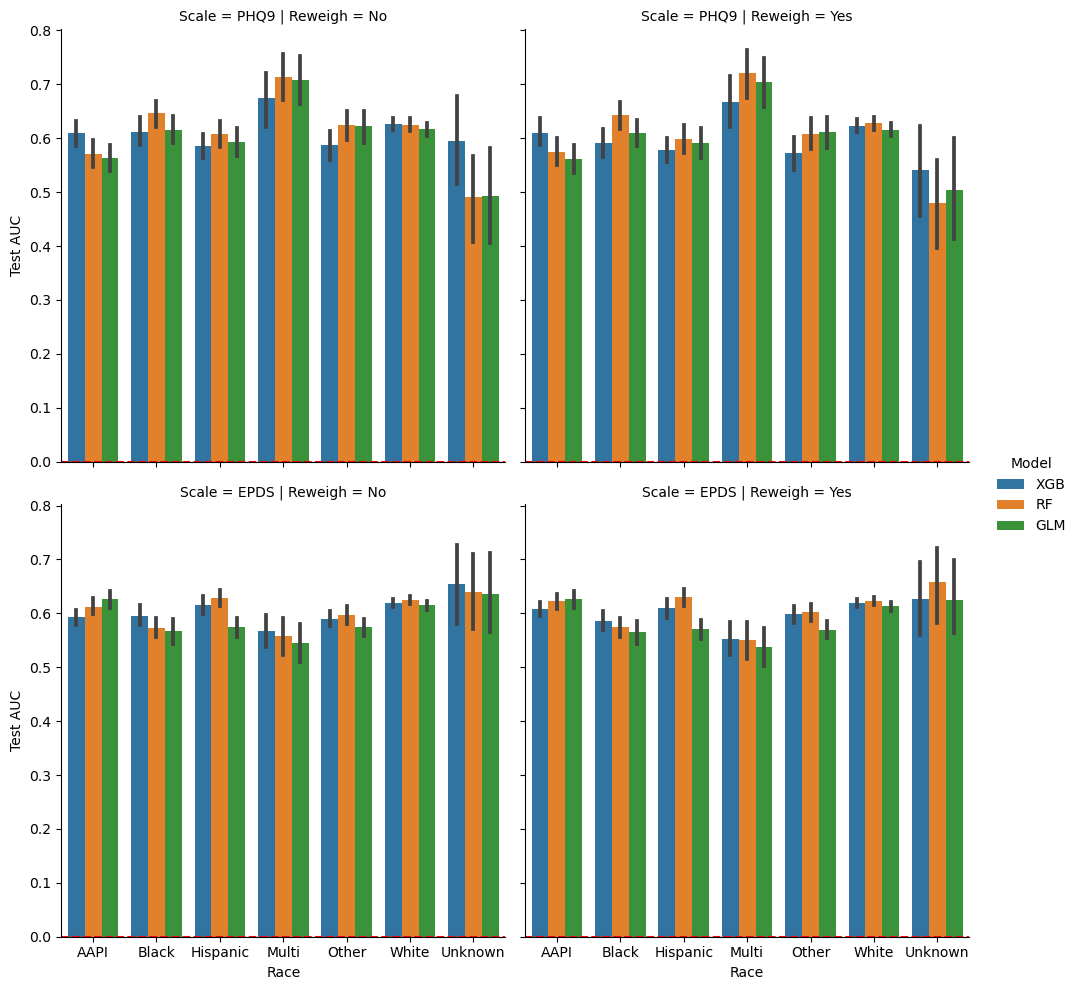

In [29]:
fig = sns.catplot(data=all_cv[all_cv['Test AUC'].notnull()], x='Race', y='Test AUC', hue='Model', row='Scale', col='Reweigh', kind='bar')
fig.refline(y=0, color='red')
plt.savefig('AUC by Race (cv).svg',format='svg',dpi=600)

# Overall Test AUC and Balanced Accuracy

## Boostrap AUC and Balanced Accuracy

In [32]:
uniq_results = all_boot.iloc[::len(races)]

In [33]:
summary = pd.DataFrame()
summary = pd.DataFrame(uniq_results.groupby(['Model','Reweigh','Scale'])['Overall Test AUC'].agg(['min','max','mean','count','std']))
summary['se'] = summary['std']/np.sqrt(summary['count'])
summary['ci_low'] = summary['mean'] - 1.96*summary['se']
summary['ci_hi'] = summary['mean'] + 1.96*summary['se']
summary

min    max     mean  count       std        se  \
Model Reweigh Scale                                                     
GLM   No      EPDS   0.537  0.713  0.62540    100  0.037401  0.003740   
              PHQ9   0.588  0.783  0.69033    100  0.037820  0.003782   
      Yes     EPDS   0.534  0.686  0.60983    100  0.036927  0.003693   
              PHQ9   0.589  0.788  0.68878    100  0.040387  0.004039   
RF    No      EPDS   0.553  0.722  0.65143    100  0.035539  0.003554   
              PHQ9   0.581  0.752  0.66589    100  0.036229  0.003623   
      Yes     EPDS   0.551  0.716  0.63641    100  0.034874  0.003487   
              PHQ9   0.571  0.759  0.67315    100  0.039921  0.003992   
XGB   No      EPDS   0.534  0.702  0.62175    100  0.034287  0.003429   
              PHQ9   0.584  0.759  0.67211    100  0.036809  0.003681   
      Yes     EPDS   0.512  0.675  0.60776    100  0.033842  0.003384   
              PHQ9   0.574  0.745  0.66506    100  0.038178  0.003818   

                       ci_low     ci_hi  
Model Reweigh Scale                      
GLM   No      EPDS   0.618069  0.632731  
              PHQ9   0.682917  0.697743  
      Yes     EPDS   0.602592  0.617068  
              PHQ9   0.680864  0.696696  
RF    No      EPDS   0.644464  0.658396  
              PHQ9   0.658789  0.672991  
      Yes     EPDS   0.629575  0.643245  
              PHQ9   0.665325  0.680975  
XGB   No      EPDS   0.615030  0.628470  
              PHQ9   0.664896  0.679324  
      Yes     EPDS   0.601127  0.614393  
              PHQ9   0.657577  0.672543

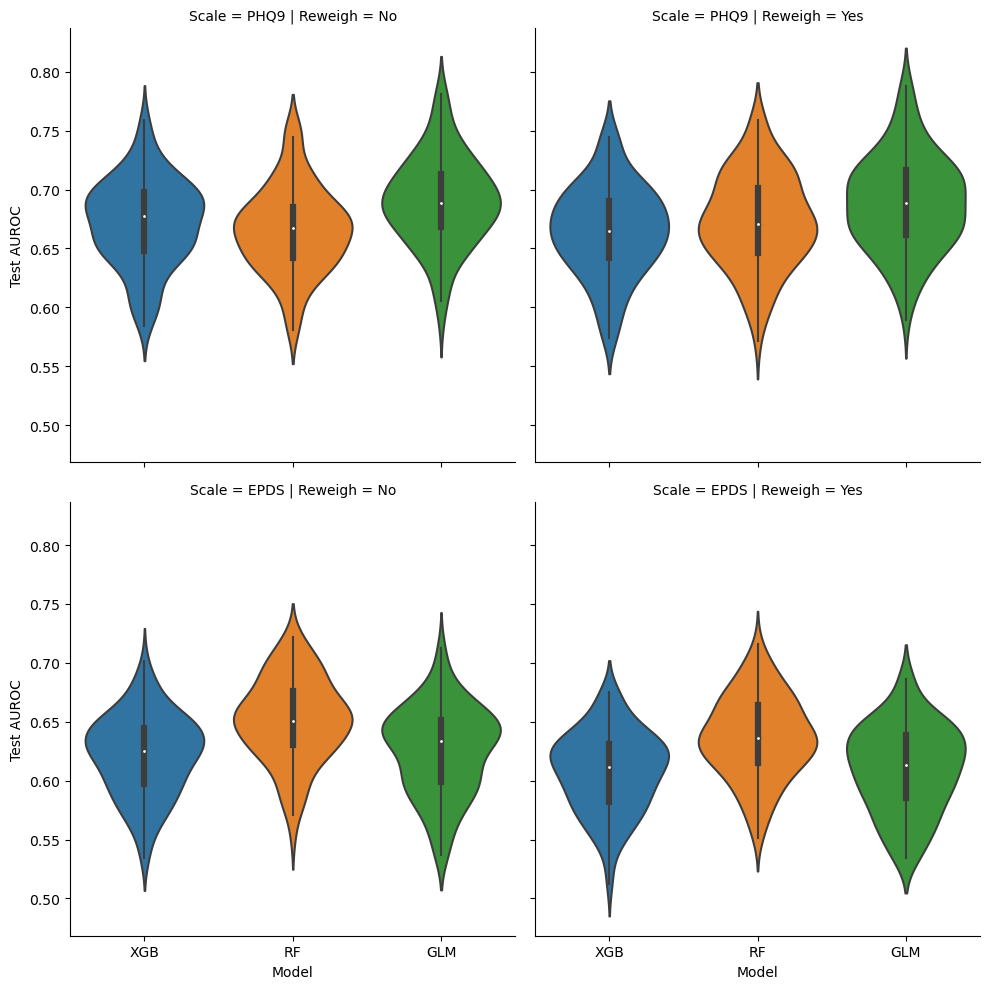

In [34]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test AUC'].notnull()], 
                  x='Model', y='Overall Test AUC', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test AUROC')
plt.savefig('Violin of AUC (boot).svg',format='svg',dpi=600)

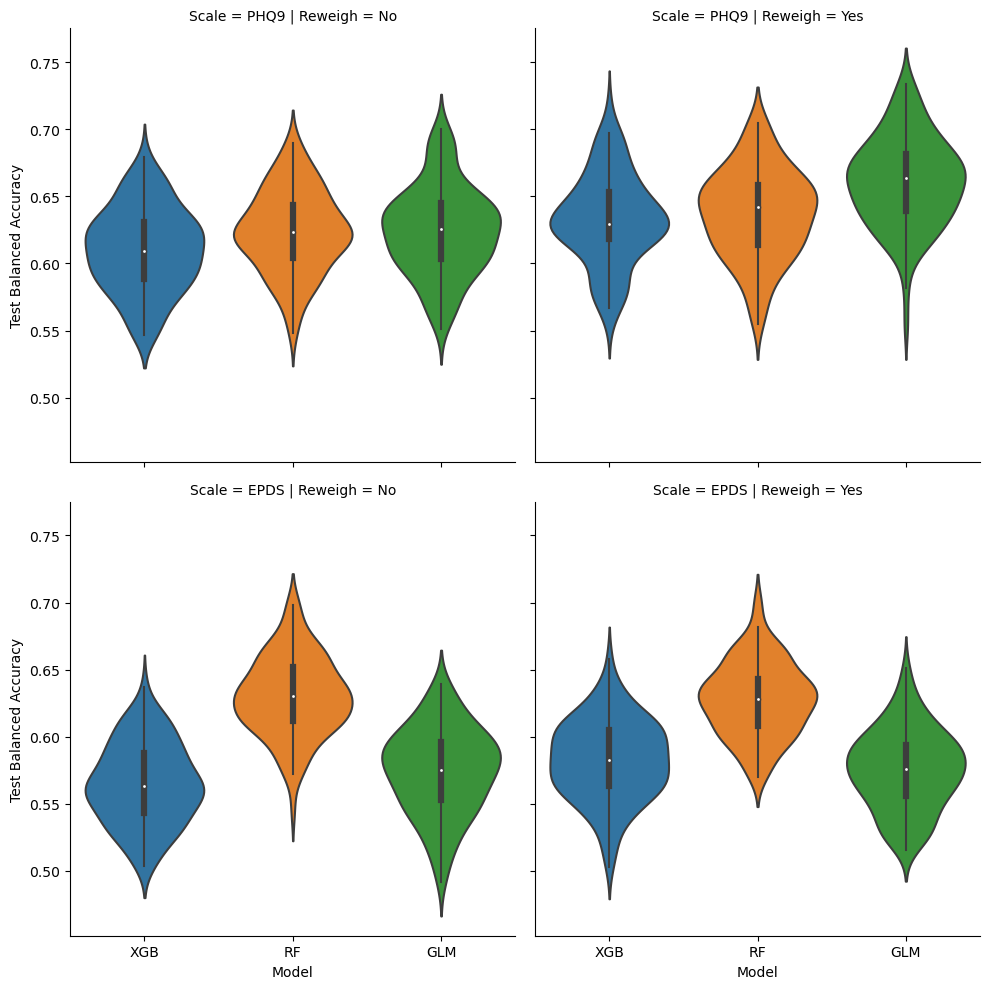

In [35]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test BA'].notnull()], 
                  x='Model', y='Overall Test BA', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test Balanced Accuracy')
plt.savefig('Violin of BA (boot).svg',format='svg',dpi=600)

## Cross Validation AUC and Balanced Accuracy

In [37]:
uniq_results = all_cv.iloc[::len(races)]

In [38]:
summary = pd.DataFrame()
summary = pd.DataFrame(uniq_results.groupby(['Model','Reweigh','Scale'])['Overall Test AUC'].agg(['min','max','mean','count','std']))
summary['se'] = summary['std']/np.sqrt(summary['count'])
summary['ci_low'] = summary['mean'] - 1.96*summary['se']
summary['ci_hi'] = summary['mean'] + 1.96*summary['se']
summary

min    max     mean  count       std        se  \
Model Reweigh Scale                                                     
GLM   No      EPDS   0.504  0.708  0.61219    100  0.029564  0.002956   
              PHQ9   0.498  0.725  0.62804    100  0.046431  0.004643   
      Yes     EPDS   0.499  0.667  0.59564    100  0.028511  0.002851   
              PHQ9   0.502  0.715  0.60662    100  0.045377  0.004538   
RF    No      EPDS   0.552  0.688  0.62165    100  0.026184  0.002618   
              PHQ9   0.509  0.730  0.63579    100  0.046376  0.004638   
      Yes     EPDS   0.546  0.667  0.61363    100  0.025835  0.002583   
              PHQ9   0.524  0.725  0.62573    100  0.045346  0.004535   
XGB   No      EPDS   0.548  0.675  0.61535    100  0.029204  0.002920   
              PHQ9   0.526  0.725  0.63292    100  0.043506  0.004351   
      Yes     EPDS   0.551  0.665  0.60889    100  0.026129  0.002613   
              PHQ9   0.513  0.704  0.61622    100  0.042554  0.004255   

                       ci_low     ci_hi  
Model Reweigh Scale                      
GLM   No      EPDS   0.606395  0.617985  
              PHQ9   0.618940  0.637140  
      Yes     EPDS   0.590052  0.601228  
              PHQ9   0.597726  0.615514  
RF    No      EPDS   0.616518  0.626782  
              PHQ9   0.626700  0.644880  
      Yes     EPDS   0.608566  0.618694  
              PHQ9   0.616842  0.634618  
XGB   No      EPDS   0.609626  0.621074  
              PHQ9   0.624393  0.641447  
      Yes     EPDS   0.603769  0.614011  
              PHQ9   0.607879  0.624561

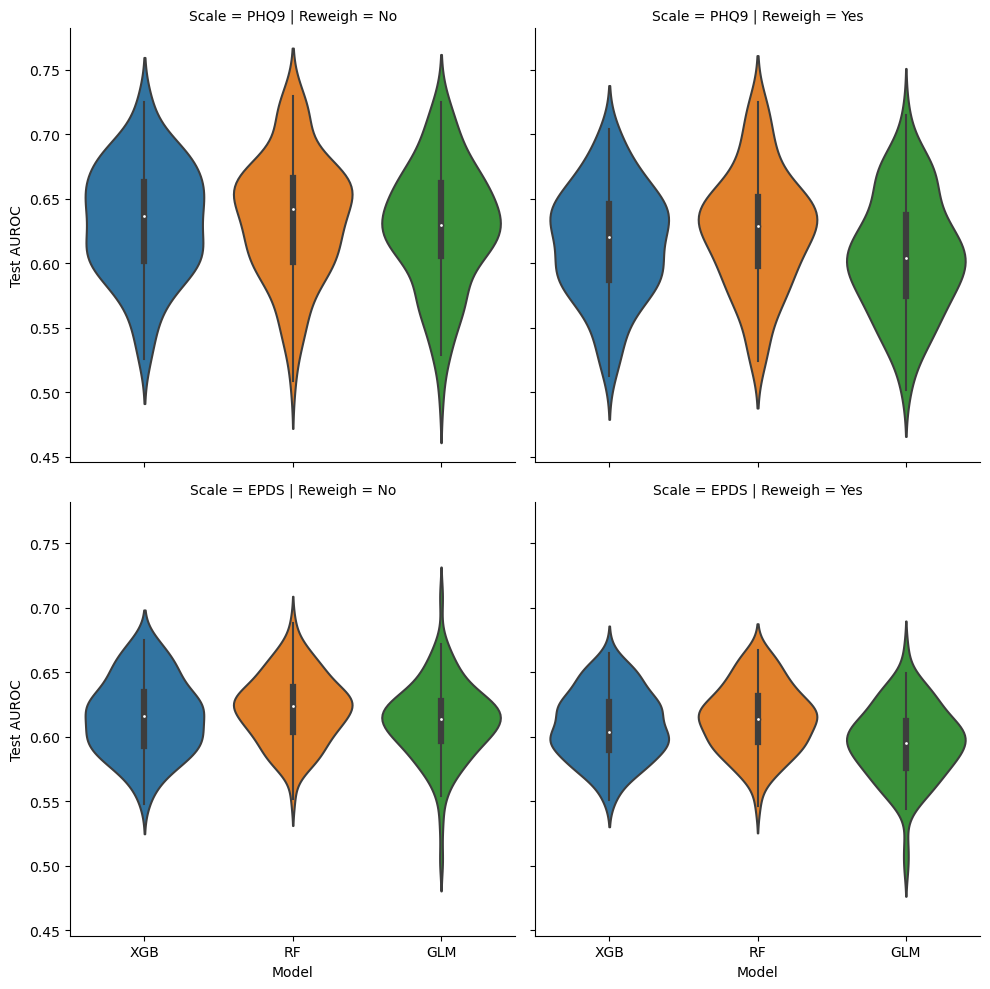

In [39]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test AUC'].notnull()], 
                  x='Model', y='Overall Test AUC', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test AUROC')
plt.savefig('Violin of AUC (cv).svg',format='svg',dpi=600)

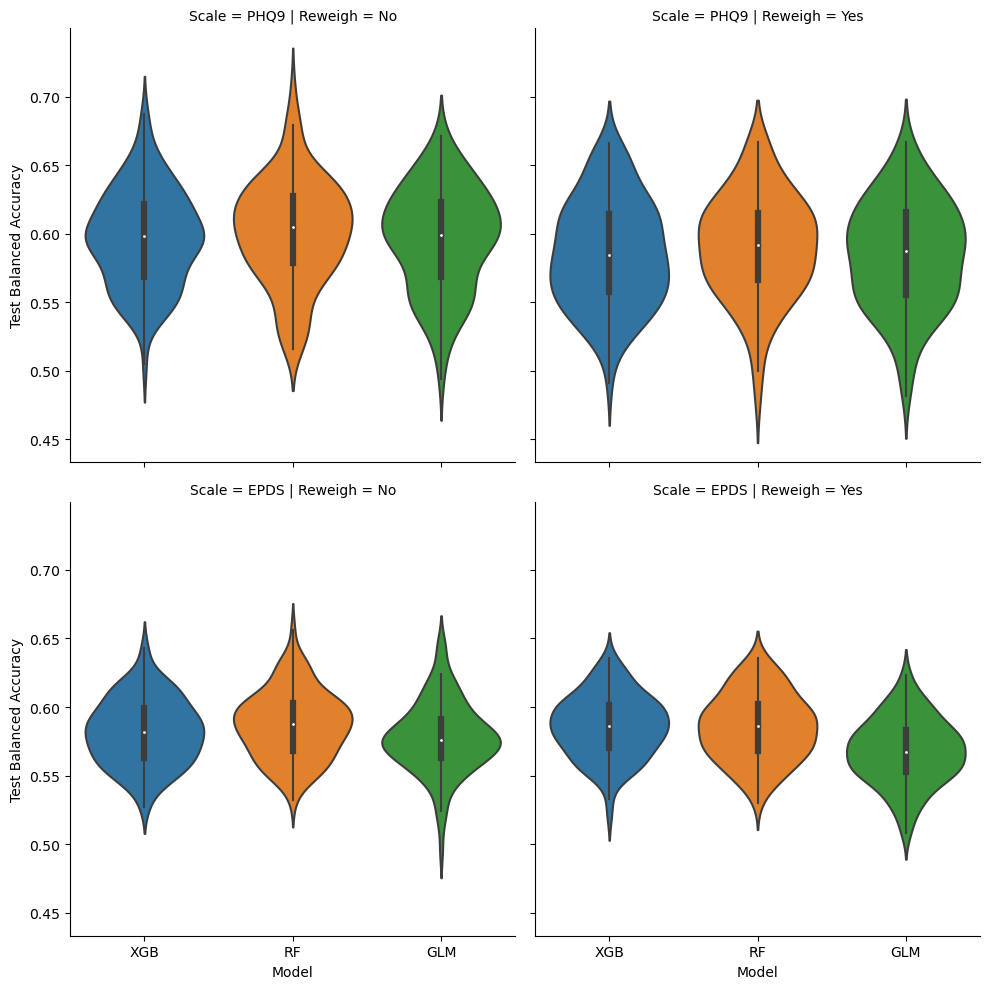

In [40]:
fig = sns.catplot(data=uniq_results[uniq_results['Overall Test BA'].notnull()], 
                  x='Model', y='Overall Test BA', hue='Model', row='Scale', col='Reweigh', 
                  kind='violin',
                  dodge=False)
fig.set(ylabel='Test Balanced Accuracy')
plt.savefig('Violin of BA (cv).svg',format='svg',dpi=600)

In [81]:
# save this file and output as html
import os
os.system('jupyter nbconvert --to html plotting_and_analyses.ipynb')

[NbConvertApp] Converting notebook plotting_and_analyses.ipynb to html
[NbConvertApp] Writing 1890080 bytes to plotting_and_analyses.html


0